In [2]:
import pandas as pd
data=pd.read_csv('CC_DATA.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


unsupervised algorithm is the clustering

From the dataset customers of similar characteristics have to be found out

In [3]:
cus=data['CUST_ID']

In [4]:
data=data.dropna()

In [5]:
data1=data.drop(['CUST_ID'],1)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_norm=sc.fit_transform(data1)

If the whole group is fitted into 2 then the number has to be given as 2

In [7]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,random_state=48)

In [8]:
km.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=48, tol=0.0001, verbose=0)

km is the model name of the cluster

In [9]:
grp=km.predict(data_norm)
grp

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
grp=pd.DataFrame(grp)
grp.head()

,0
0,0
1,0
2,1
3,0
4,1


In [11]:
cus=data['CUST_ID']
cus.isnull().sum()

0

In [12]:
cus=pd.DataFrame(cus)
cus1=cus.reset_index(drop=True)

In [13]:
cus1

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10005
4,C10006
5,C10007
6,C10008
7,C10009
8,C10010
9,C10011


In [14]:
grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 1 columns):
0    8636 non-null int32
dtypes: int32(1)
memory usage: 33.8 KB


In [15]:
con=pd.concat([cus1,grp],1)

In [16]:
grp0=con[con[0]==0]
grp1=con[con[0]==1]
grp2=con[con[0]==2]

In [17]:
grp0.head()

,CUST_ID,0
0,C10001,0
1,C10002,0
3,C10005,0
7,C10009,0
8,C10010,0


In [18]:
grp0.shape

(5023, 2)

The number of features after dropping the values

In [19]:
data1.shape

(8636, 17)

In [20]:
grp1.shape

(3613, 2)

In [21]:
grp2.shape

(0, 2)

In [22]:
grp.shape

(8636, 1)

In [23]:
cent=km.cluster_centers_

In [24]:
cent.shape

(2, 17)

This is the centralized data for normalized data

This is the centroid

In [25]:
cent1=sc.inverse_transform(cent)
cent1

array([[1.75043730e+03, 8.52351406e-01, 2.81850527e+02, 2.03863357e+02,
        7.82781433e+01, 1.39116136e+03, 2.00613732e-01, 9.13196334e-02,
        1.06835184e-01, 1.94155586e-01, 4.67203980e+00, 3.48119403e+00,
        4.08060853e+03, 1.46343637e+03, 8.55354088e+02, 7.55059065e-02,
        1.14300498e+01],
       [1.39358371e+03, 9.54432957e-01, 2.06019054e+03, 1.16297852e+03,
        8.97551116e+02, 4.41737460e+02, 9.07054002e-01, 3.65368798e-01,
        7.33393992e-01, 5.89083600e-02, 1.42398228e+00, 3.11088341e+01,
        5.13644981e+03, 2.23123376e+03, 8.76760785e+02, 2.75914961e-01,
        1.16795901e+01]])

In [26]:
cent1=pd.DataFrame(cent1)

In [27]:
cent1.columns=data1.columns
cent1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1750.437295,0.852351,281.850527,203.863357,78.278143,1391.161363,0.200614,0.091320,0.106835,0.194156,4.672040,3.481194,4080.608533,1463.436369,855.354088,0.075506,11.43005
1,1393.583707,0.954433,2060.190540,1162.978524,897.551116,441.737460,0.907054,0.365369,0.733394,0.058908,1.423982,31.108834,5136.449807,2231.233761,876.760785,0.275915,11.67959


In [28]:
from sklearn.decomposition import PCA
pca=PCA(2)

as the above value is given as 2 the 17 features which are present are scaled down to 2 features

Concentrate much on quality of clustering

Increasing the number of clusters must not make any overlap in the clusters........so find the optimal value of 
'k' so that there is no overlapping

In each and every feature of 

In [29]:
datapca=pca.fit_transform(data_norm)

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

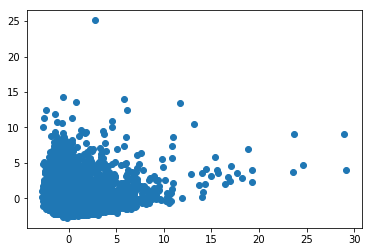

In [31]:
plt.scatter(datapca[:,0],datapca[:,1])

now introducing the cluster concept

In [32]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=7,random_state=48)

In [33]:
km.fit(datapca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=48, tol=0.0001, verbose=0)

In [34]:
g=km.predict(datapca)

In [35]:
sd=silhouette_score(data_norm,g)
sd

0.1334787592750487

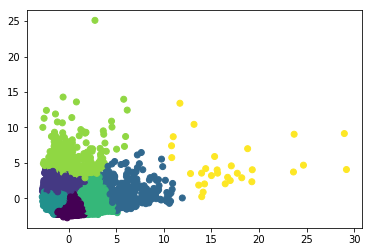

In [36]:
plt.scatter(datapca[:,0],datapca[:,1],c=g)

w.r.t 17 columns 5 clusters can be brought...........no. of clusters is just the reduction of the data

there are 3 colors bcoz the no. of clusters given is 3

silhouetee score will give the distance measure between 2 clusters

silhouette score is the measure between each and every point to each and every point in the other cluster

silhouette score ranges from -1 to 1...if the value is +1 then both the clusters are descriminative if silhouette score is 0
then both are overlapped if silhouette scoere is -1 then both the clusters are completely overlapped

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
sd

0.1334787592750487

In [48]:
from sklearn.metrics import silhouette_score
k=[2,3,4,5,6]
for i in k:
    km=KMeans(n_clusters=3,random_state=48)
    modfit=km.fit(data_norm)
    L=modfit.predict(data_norm)
    score=silhouette_score(data_norm,L)
    print("The silhouettte score for {} cluster is {}".format(i,score))   

The silhouettte score for 1 cluster is 0.2477933841417514
The silhouettte score for 2 cluster is 0.2477933841417514
The silhouettte score for 3 cluster is 0.2477933841417514
The silhouettte score for 4 cluster is 0.2477933841417514
The silhouettte score for 5 cluster is 0.2477933841417514
The silhouettte score for 6 cluster is 0.2477933841417514
The silhouettte score for 7 cluster is 0.2477933841417514
The silhouettte score for 8 cluster is 0.2477933841417514


WCC is within close centred i.e., is the distance between the points within the cluster

In [49]:
km.inertia_

108086.40093574334

It is a normalized value...........it is sum of the cumulative measure of all the elements within the cluster

In [52]:
clust_range=range(1,8)
clust_err=[]
for num_clust in clust_range:
    clusters=KMeans(num_clust)
    clusters.fit(data_norm)
    clust_err.append(clusters.inertia_)

The below graph is known as elbow curve

the slope where it is much sharp,look the corresponding value then it is the optimal 'k' value for your data

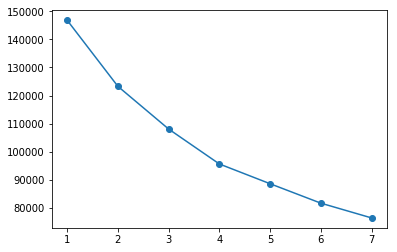

In [53]:
plt.plot(clust_range,clust_err,marker='o')

there are 3 ways to determine the 'k' value one is the PCA method other are the elbow curve and silhouette score